In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('incidents_small.csv', nrows=10000 , parse_dates=['Date'])
df.shape

(10000, 13)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidntNum  10000 non-null  int64         
 1   Category    10000 non-null  object        
 2   Descript    10000 non-null  object        
 3   DayOfWeek   10000 non-null  object        
 4   Date        10000 non-null  datetime64[ns]
 5   Time        10000 non-null  object        
 6   PdDistrict  10000 non-null  object        
 7   Resolution  10000 non-null  object        
 8   Address     10000 non-null  object        
 9   X           10000 non-null  float64       
 10  Y           10000 non-null  float64       
 11  Location    10000 non-null  object        
 12  PdId        10000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1015.8+ KB


In [55]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13


In [56]:
df.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [57]:
cols_to_drop = ['IncidntNum', 'Address', 'Location', 'PdId']
df.drop(columns=cols_to_drop , inplace=True)

In [58]:
df['Category'] = df['Category'].apply(lambda val: val.lower())
df.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,X,Y
0,weapon laws,POSS OF PROHIBITED WEAPON,Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",-122.403405,37.775421
1,weapon laws,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,2016-01-29,11:00,SOUTHERN,"ARREST, BOOKED",-122.403405,37.775421
2,warrants,WARRANT ARREST,Monday,2016-04-25,14:59,BAYVIEW,"ARREST, BOOKED",-122.388856,37.729981
3,non-criminal,LOST PROPERTY,Tuesday,2016-01-05,23:50,TENDERLOIN,NONE,-122.412971,37.785788
4,non-criminal,LOST PROPERTY,Friday,2016-01-01,00:30,MISSION,NONE,-122.419672,37.765050


In [74]:
df['Descript'] = df['Descript'].apply(lambda val: val.lower())
df['DayOfWeek'] = df['DayOfWeek'].apply(lambda val: val.lower())
df['PdDistrict'] = df['PdDistrict'].apply(lambda val: val.lower())
df['Resolution'] = df['Resolution'].apply(lambda val: val.lower())
df.head()


,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,X,Y
0,weapon laws,poss of prohibited weapon,friday,2016-01-29,11:00,southern,"arrest, booked",-122.403405,37.775421
1,weapon laws,"firearm, loaded, in vehicle, possession or use",friday,2016-01-29,11:00,southern,"arrest, booked",-122.403405,37.775421
2,warrants,warrant arrest,monday,2016-04-25,14:59,bayview,"arrest, booked",-122.388856,37.729981
3,non-criminal,lost property,tuesday,2016-01-05,23:50,tenderloin,none,-122.412971,37.785788
4,non-criminal,lost property,friday,2016-01-01,00:30,mission,none,-122.419672,37.765050


In [ ]:
df['Category'].value_counts()

In [ ]:
categorydf = df.groupby(['Category', 'PdDistrict'] ,as_index=False)['Descript'].count()
categorydf

,Category,PdDistrict,Descript
0,arson,BAYVIEW,5
1,arson,CENTRAL,3
2,arson,INGLESIDE,2
3,arson,MISSION,4
4,arson,NORTHERN,1
...,...,...,...
288,weapon laws,PARK,6
289,weapon laws,RICHMOND,8
290,weapon laws,SOUTHERN,31
291,weapon laws,TARAVAL,7


In [61]:
categorydf[categorydf['Category']=='weapon laws']

,Category,PdDistrict,Descript
283,weapon laws,BAYVIEW,17
284,weapon laws,CENTRAL,9
285,weapon laws,INGLESIDE,10
286,weapon laws,MISSION,25
287,weapon laws,NORTHERN,13
288,weapon laws,PARK,6
289,weapon laws,RICHMOND,8
290,weapon laws,SOUTHERN,31
291,weapon laws,TARAVAL,7
292,weapon laws,TENDERLOIN,15


In [63]:
timeline_df=df[['Date', 'Category', 'PdDistrict']].copy()
timeline_df.sort_values(by='Date', inplace=True)
timeline_df.set_index('Date', inplace=True)


In [64]:
timeline_df.resample('M').count()['Category']

Date
2016-01-31    2097
2016-02-29    2383
2016-03-31    3359
2016-04-30    1321
2016-05-31      82
2016-06-30     111
2016-07-31     149
2016-08-31     160
2016-09-30     138
2016-10-31     182
2016-11-30      13
2016-12-31       5
Freq: M, Name: Category, dtype: int64

<AxesSubplot: xlabel='Date'>

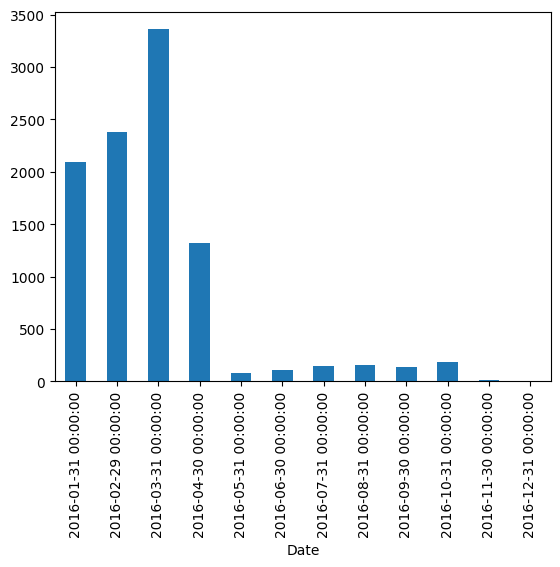

In [65]:
timeline_df.resample('M').count()['Category'].plot(kind='bar')

In [66]:
timeline_df.resample('3M').count()['Category']

Date
2016-01-31    2097
2016-04-30    7063
2016-07-31     342
2016-10-31     480
2017-01-31      18
Freq: 3M, Name: Category, dtype: int64

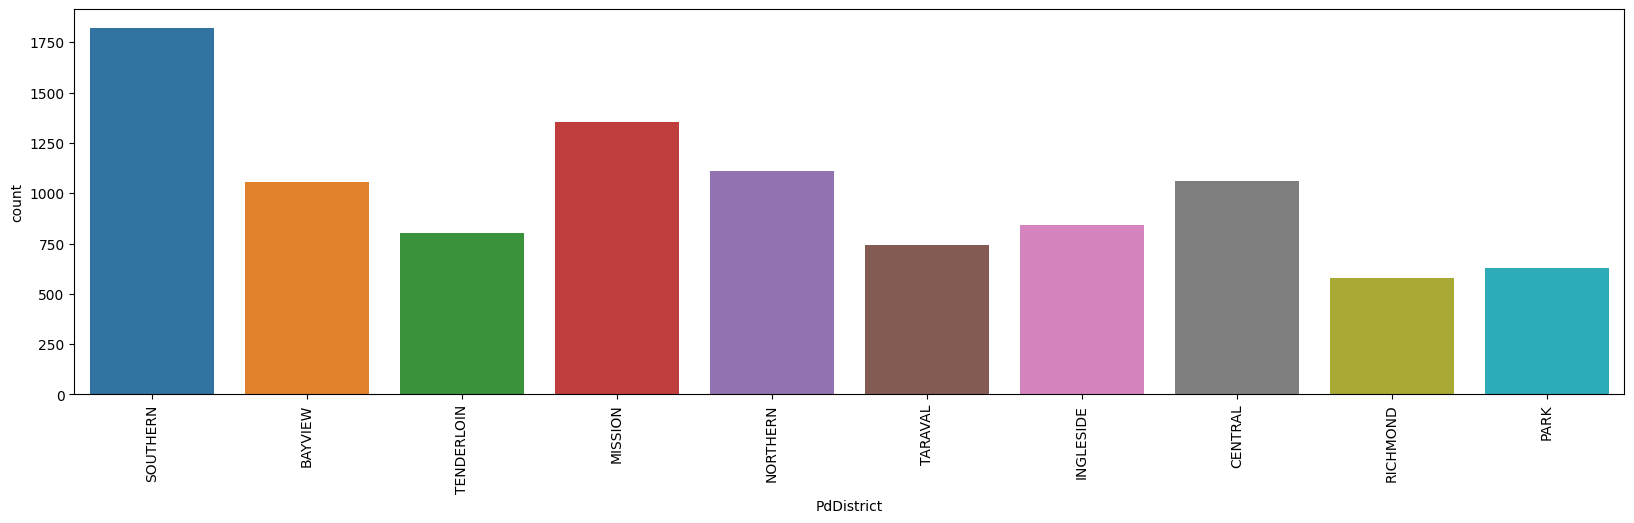

In [67]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df, x='PdDistrict', ax=ax)
plt.xticks(rotation=90)
plt.show()

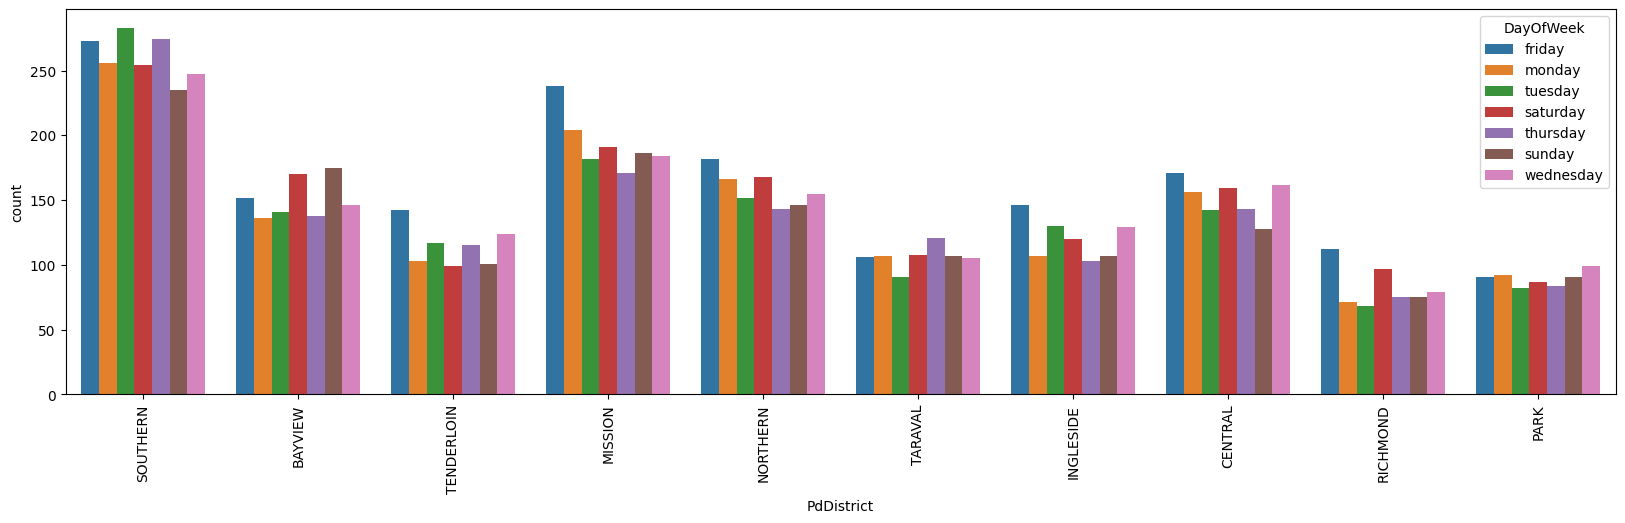

In [68]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df, x='PdDistrict', ax=ax, hue='DayOfWeek')
plt.xticks(rotation=90)
plt.show()

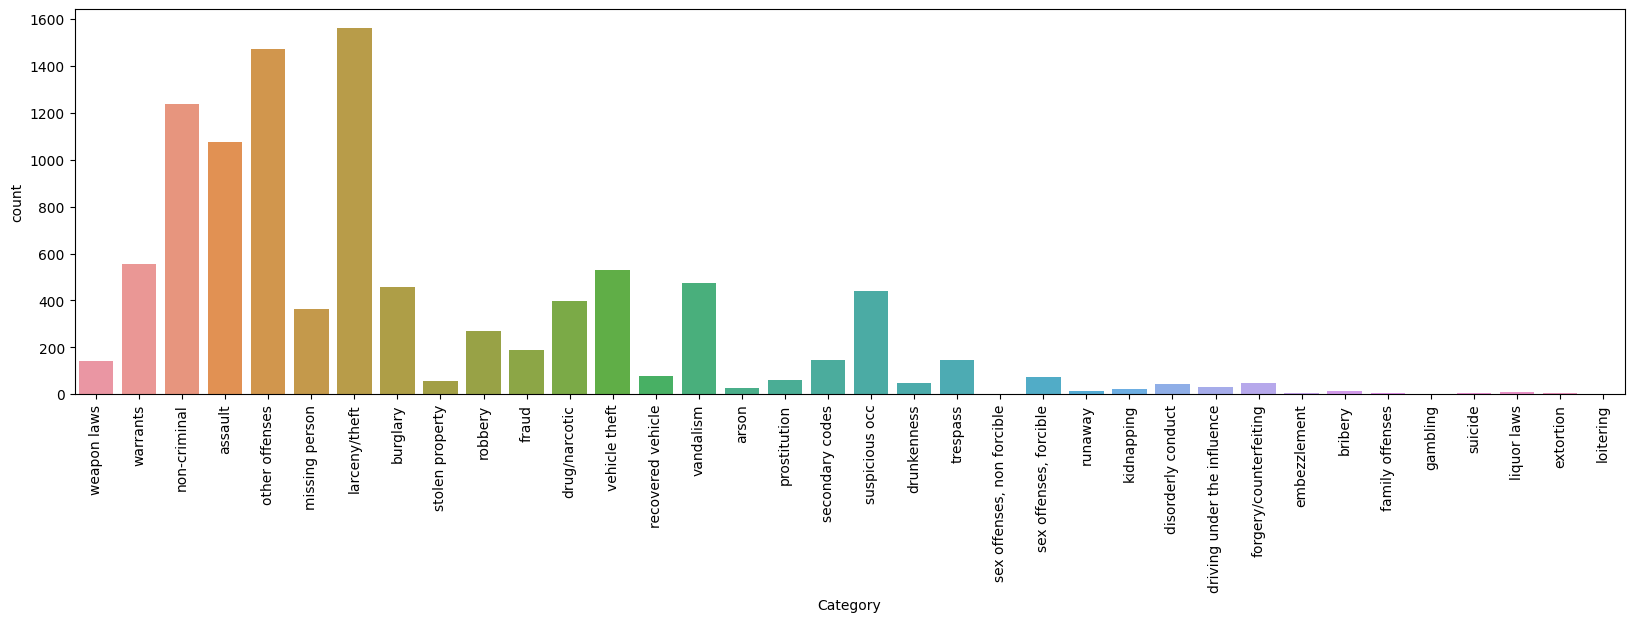

In [69]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df, x='Category', ax=ax)
plt.xticks(rotation=90)
plt.show()

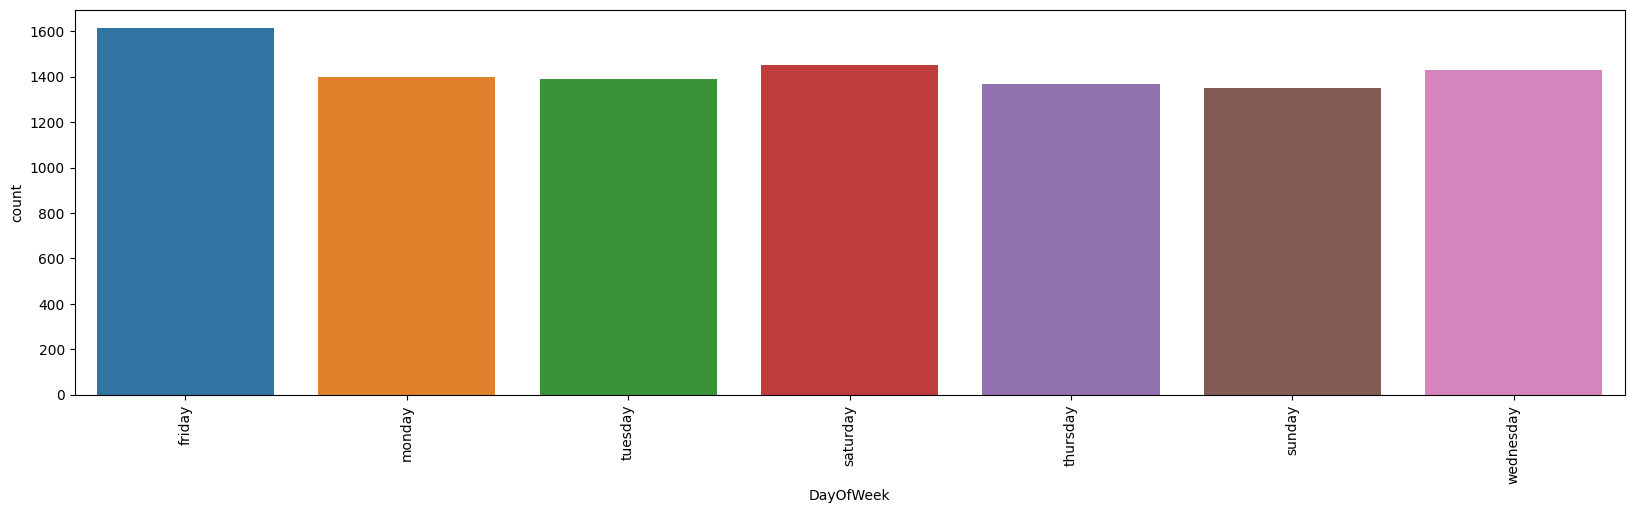

In [70]:
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(df, x='DayOfWeek', ax=ax)
plt.xticks(rotation=90)
plt.show()